### MovieLens Dataset - Prepared for Women Who Code - Python for Data Analysis Series

#### Data Preprocessing and Feature Engineering

GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set. Before using these data sets, please review their README files for the usage licenses and other details.

100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#import datasets
movies_df=pd.read_csv("ml-latest-small/movies.csv")
ratings_df=pd.read_csv("ml-latest-small/ratings.csv")
tags_df=pd.read_csv("ml-latest-small/tags.csv")
links_df=pd.read_csv("ml-latest-small/links.csv")

###### Explore movies.csv

In [3]:
movies_df.shape

(9742, 3)

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###### Explore ratings.csv

In [6]:
ratings_df.shape

(100836, 4)

In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


###### Explore tags.csv

In [9]:
tags_df.shape

(3683, 4)

In [10]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


###### Explore links.csv

In [12]:
links_df.shape

(9742, 3)

In [13]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB


In [14]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


###### Now that we have a basic idea on the data provided let's what needs to be done to make the dataset ready for analysis/modeling.'

### Data Preprocessing - movies_df

#### Movie Year?

The year of the movie is within the title field. Let's split it so that we can do analysis by year.

In [15]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
movies_df['year']=movies_df['title'].str.extract('(\d\d\d\d)', expand=True)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


###### Plot movie count by year to see trend

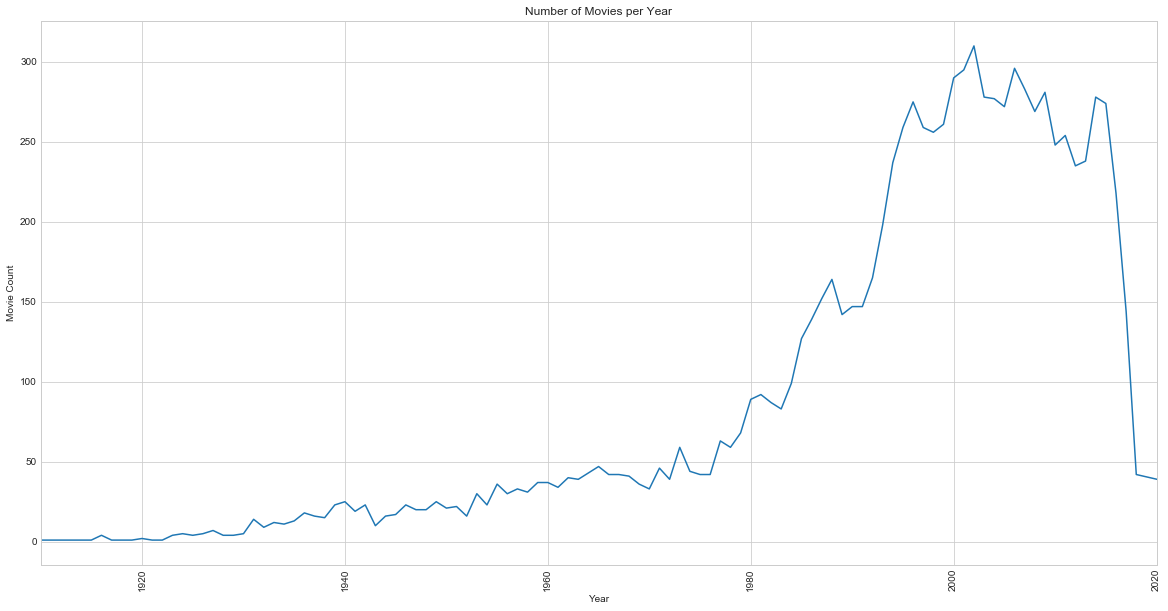

In [17]:
plt.figure(figsize=(20,10))
plt.plot(movies_df.groupby(['year']).count()['title'])
plt.xticks(rotation=90)
plt.xlim(1910,2020)
plt.title("Number of Movies per Year")
plt.xlabel('Year')
plt.ylabel('Movie Count')

###### Whats the best way to feature engineer genres

In [18]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [19]:
#separate as genre_0, genre_1,.......
movies_df['genres'].str.split('|', expand=True).head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


This is what we get if we split to genre_0,genre_1,......
However, this is not a useful representation for analysis and modeling

In [20]:
#separate as genre_X, genre_y,.......   
movies_df.genres.str.get_dummies(sep='|').head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This is what we get when we do one hot encoding.

In [21]:
movies_df = pd.concat([movies_df.drop('genres', axis=1), movies_df.genres.str.get_dummies(sep='|')], axis=1) 

In [22]:
movies_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing - ratings_df

###### How many unique users

In [23]:
ratings_df.userId.nunique()

610

###### How many unique movies were rated

In [24]:
ratings_df.movieId.nunique()

9724

There were 9742 movies in the movies dataframe. Looks like we have atleast one rating for most movies.

###### Change dtype of Rating Timestamp

In [25]:
ratings_df['rating_timestamp']=pd.to_datetime(ratings_df['timestamp'], unit='s')

###### Feature Engineering with Dates

In [26]:
ratings_df['rating_timestamp_month']=ratings_df['rating_timestamp'].dt.month
ratings_df['rating_timestamp_year']=ratings_df['rating_timestamp'].dt.year
ratings_df['rating_timestamp_week']=ratings_df['rating_timestamp'].dt.week
ratings_df['rating_timestamp_dayofweek']=ratings_df['rating_timestamp'].dt.weekday
ratings_df['rating_timestamp_hour']=ratings_df['rating_timestamp'].dt.hour

In [27]:
ratings_df.head()

,userId,movieId,rating,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
0,1,1,4.0,964982703,2000-07-30 18:45:03,7,2000,30,6,18
1,1,3,4.0,964981247,2000-07-30 18:20:47,7,2000,30,6,18
2,1,6,4.0,964982224,2000-07-30 18:37:04,7,2000,30,6,18
3,1,47,5.0,964983815,2000-07-30 19:03:35,7,2000,30,6,19
4,1,50,5.0,964982931,2000-07-30 18:48:51,7,2000,30,6,18


###### Data Visualization based on derived fields.

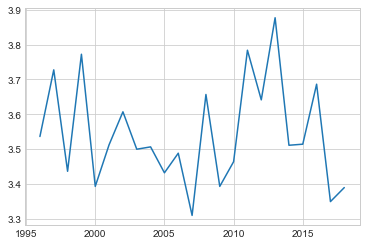

In [28]:
#Average rating by year
plt.plot(ratings_df.groupby(['rating_timestamp_year']).mean()['rating'])

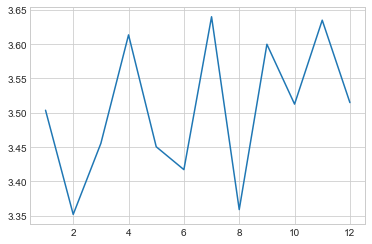

In [29]:
#Average rating by month
plt.plot(ratings_df.groupby(['rating_timestamp_month']).mean()['rating'])

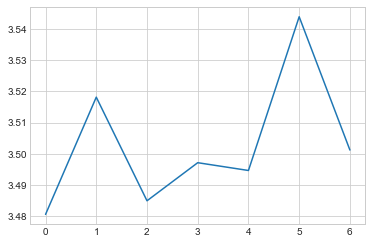

In [30]:
#Average rating by day of week
plt.plot(ratings_df.groupby(['rating_timestamp_dayofweek']).mean()['rating'])

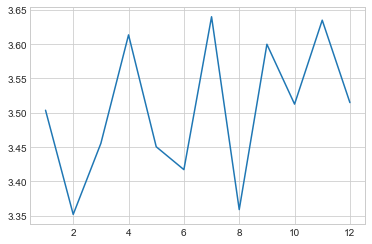

In [31]:
#Average rating by day of week
plt.plot(ratings_df.groupby(['rating_timestamp_month']).mean()['rating'])

### Data Preprocessing - tags_df

###### How many unique tags

In [32]:
tags_df.userId.nunique()

58

###### Which are the unique tags

In [33]:
tags_df.tag.unique()

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

###### How many unique movies has tags

In [34]:
tags_df.movieId.nunique()

1572

###### Change dtype of Rating Timestamp

In [35]:
tags_df['tag_timestamp']=pd.to_datetime(tags_df['timestamp'], unit='s')

###### Feature Engineering with Dates

In [36]:
tags_df['tag_timestamp_month']=tags_df['tag_timestamp'].dt.month
tags_df['tag_timestamp_year']=tags_df['tag_timestamp'].dt.year
tags_df['tag_timestamp_week']=tags_df['tag_timestamp'].dt.week
tags_df['tag_timestamp_dayofweek']=tags_df['tag_timestamp'].dt.weekday
tags_df['tag_timestamp_hour']=tags_df['tag_timestamp'].dt.hour

###### Data Visualization based on derived fields.

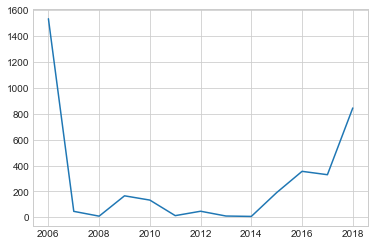

In [37]:
#Tag count by year
plt.plot(tags_df.groupby(['tag_timestamp_year']).count()['tag'])

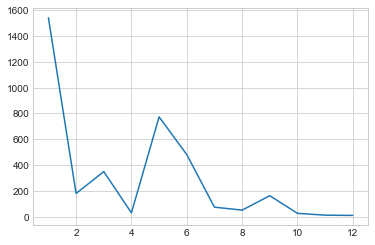

In [38]:
#Tag count by month
plt.plot(tags_df.groupby(['tag_timestamp_month']).count()['tag'])

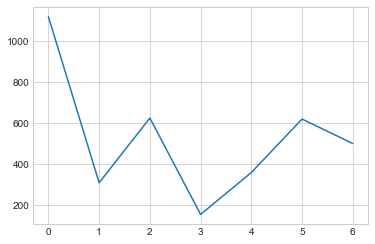

In [39]:
#Tag count by day of week
plt.plot(tags_df.groupby(['tag_timestamp_dayofweek']).count()['tag'])

###### Merge movies with ratings

In [40]:
movies_df['year']=pd.to_numeric(movies_df['year'])
movies_df=movies_df[(movies_df['year'] > 1915) & (movies_df['year'] < 2020)]
movieratings_df = pd.merge(movies_df, ratings_df)

In [41]:
movieratings_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Western,userId,rating,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,1,4.0,964982703,2000-07-30 18:45:03,7,2000,30,6,18
1,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,5,4.0,847434962,1996-11-08 06:36:02,11,1996,45,4,6
2,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,7,4.5,1106635946,2005-01-25 06:52:26,1,2005,4,1,6
3,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,15,2.5,1510577970,2017-11-13 12:59:30,11,2017,46,0,12
4,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,17,4.5,1305696483,2011-05-18 05:28:03,5,2011,20,2,5


###### Top 10 movies by rating count

In [42]:
movieratings_df.groupby(['title']).count()['rating'].sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

###### Top movies by rating average = 5

In [43]:
grouped=movieratings_df.groupby(['title'])
grouped.filter(lambda x: x['rating'].mean() == 5)

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Western,userId,rating,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
2611,53,Lamerica (1994),1994.0,0,0,1,0,0,0,0,...,0,85,5.0,889468268,1998-03-09 18:31:08,3,1998,11,0,18
2612,53,Lamerica (1994),1994.0,0,0,1,0,0,0,0,...,0,603,5.0,963180003,2000-07-09 22:00:03,7,2000,27,6,22
3190,99,Heidi Fleiss: Hollywood Madam (1995),1995.0,0,0,0,0,0,0,0,...,0,191,5.0,829759809,1996-04-17 16:50:09,4,1996,16,2,16
3191,99,Heidi Fleiss: Hollywood Madam (1995),1995.0,0,0,0,0,0,0,0,...,0,603,5.0,954482070,2000-03-31 05:54:30,3,2000,13,4,5
4051,148,"Awfully Big Adventure, An (1995)",1995.0,0,0,0,0,0,0,0,...,0,191,5.0,829760897,1996-04-17 17:08:17,4,1996,16,2,17
12885,467,Live Nude Girls (1995),1995.0,0,0,0,0,0,1,0,...,0,492,5.0,863976567,1997-05-18 17:29:27,5,1997,20,6,17
13520,495,In the Realm of the Senses (Ai no corrida) (1976),1976.0,0,0,0,0,0,0,0,...,0,603,5.0,953927108,2000-03-24 19:45:08,3,2000,12,4,19
13521,496,What Happened Was... (1994),1994.0,0,0,0,0,0,1,0,...,0,191,5.0,829760898,1996-04-17 17:08:18,4,1996,16,2,17
17255,626,"Thin Line Between Love and Hate, A (1996)",1996.0,0,0,0,0,0,1,0,...,0,544,5.0,850688776,1996-12-15 22:26:16,12,1996,50,6,22
17309,633,Denise Calls Up (1995),1995.0,0,0,0,0,0,1,0,...,0,555,5.0,978746353,2001-01-06 01:59:13,1,2001,1,5,1


###### Average Ratings of movies made by year

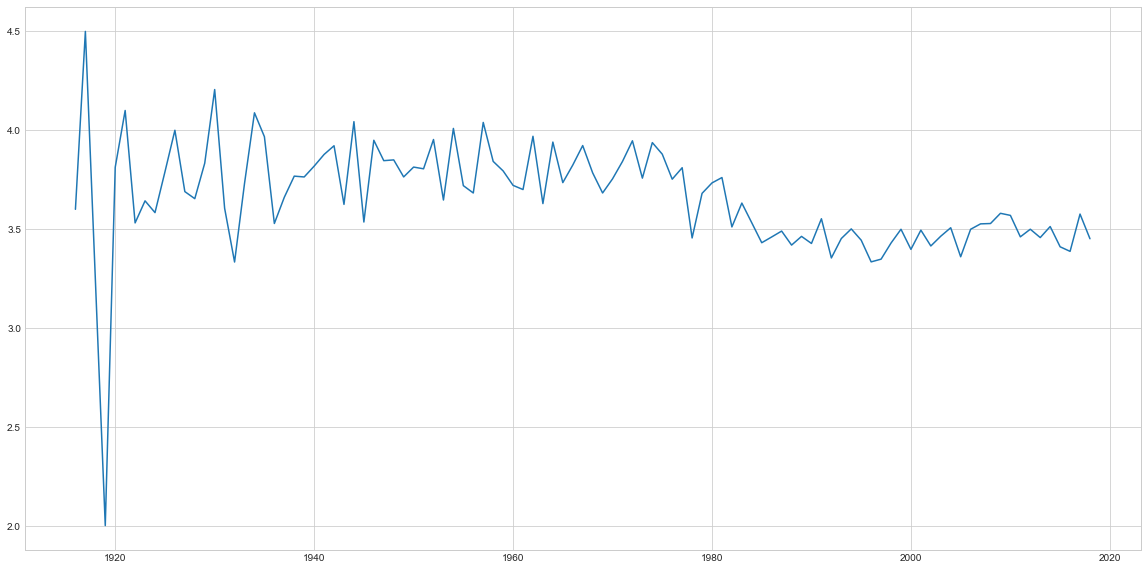

In [45]:
plt.figure(figsize=(20,10))
plt.plot(movieratings_df.groupby(['year']).mean()['rating'])

###### Average Rating by Movie

In [46]:
movies_df

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),1995.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),1995.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),1995.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
avg_rating_df=pd.DataFrame(ratings_df.groupby(['movieId']).mean()['rating'].reset_index())
movie_avg_rating_df=pd.merge(movies_df,avg_rating_df)

In [48]:
movie_avg_rating_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.920930
1,2,Jumanji (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.431818
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.259615
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.357143
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.071429


###### Tags by Rating

In [49]:
tag_avg_rating_df=pd.merge(tags_df,avg_rating_df)

In [50]:
tag_avg_rating_df.head()

,userId,movieId,tag,timestamp,tag_timestamp,tag_timestamp_month,tag_timestamp_year,tag_timestamp_week,tag_timestamp_dayofweek,tag_timestamp_hour,rating
0,2,60756,funny,1445714994,2015-10-24 19:29:54,10,2015,43,5,19,3.553571
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56,10,2015,43,5,19,3.553571
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52,10,2015,43,5,19,3.553571
3,62,60756,comedy,1528934384,2018-06-13 23:59:44,6,2018,24,2,23,3.553571
4,62,60756,funny,1528934381,2018-06-13 23:59:41,6,2018,24,2,23,3.553571


In [51]:
tag_avg_rating_df.groupby(['tag']).mean()['rating'].sort_values(ascending=False).head(10)

tag
free to download       5.000000
procedural             5.000000
no dialogue            5.000000
human rights           5.000000
creativity             5.000000
Dystopia               4.750000
thought provoking      4.750000
parrots                4.750000
jon hamm               4.750000
movies about movies    4.666667
Name: rating, dtype: float64

In [52]:
tag_avg_rating_df.groupby(['tag']).count()['movieId'].sort_values(ascending=False).head(10)

tag
In Netflix queue     119
atmospheric           36
thought-provoking     24
superhero             24
Disney                23
surreal               23
funny                 23
religion              22
psychology            21
dark comedy           21
Name: movieId, dtype: int64